<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/0_ANN_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow 2.0
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 501kB 59.5MB/s 
     |████████████████████████████████| 3.1MB 60.5MB/s 


In [0]:
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importing the Libraries

import numpy as np
import pandas as pd
import datetime
from tensorflow.keras.datasets import fashion_mnist

In [0]:
# Data Preprocessing

data = fashion_mnist.load_data()

In [0]:
(X_train, y_train), (X_test, y_test) = data

In [0]:
# Normalizing the Images - To make ANN Train Faster, get each pixel range between 0 and 1

X_train, X_test = X_train/255.0, X_test/255.0 # Value/Maximum

In [30]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# Reshaping the Dataset - Set the Training/Test set to Vector format; Flatten 2D vector to 1D Vector
# [-1 (all elements), height * width]; -1 means All elements in X_train

X_train_reshaped = X_train.reshape(-1, 28*28)

In [32]:
X_train_reshaped.shape

(60000, 784)

In [0]:
# Reshape the Test Data

X_test_reshaped = X_test.reshape(-1, 28*28)

In [34]:
X_test_reshaped.shape

(10000, 784)

In [0]:
# Building the Model

# Define Model
model = tf.keras.models.Sequential()

# Add Fully Connected Hidden Layer
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape = (784, ))) # Input Shape Needed only at First FC Layer

# Add Another Fully Connected Hidden Layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add Second Layer with Dropout
model.add(tf.keras.layers.Dropout(0.2))

# Add output Layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Compile the Model

model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy']) # Sparse Categorical Accuracy is used for Multiple Accuracy[Multiclass Classification]

In [37]:
# Check the Summary of Model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Training the Model

model.fit(X_train_reshaped, y_train, epochs= 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5099 - sparse_categorical_accuracy: 0.8162
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3777 - sparse_categorical_accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3424 - sparse_categorical_accuracy: 0.8734
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3211 - sparse_categorical_accuracy: 0.8813
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3007 - sparse_categorical_accuracy: 0.8887
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2874 - sparse_categorical_accuracy: 0.8928
Epoch 7/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2749 - sparse_categorical_accuracy: 0.8975
Epoch 8/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2663 - spars

In [39]:
# Evaluating the Model

model.evaluate(X_test_reshaped, y_test)


10000/10000 [==============================] - 0s 45us/sample - loss: 0.3244 - sparse_categorical_accuracy: 0.8887


[0.32444553554058075, 0.8887]

In [40]:
'''
# Saving the Architecture of the Model

model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

# Saving the Weights of the Model

model.save_weights("fashion_model.h5")

'''

'\n# Saving the Architecture of the Model\n\nmodel_json = model.to_json()\nwith open("fashion_model.json", "w") as json_file:\n    json_file.write(model_json)\n\n# Saving the Weights of the Model\n\nmodel.save_weights("fashion_model.h5")\n\n'

In [0]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [0]:
# Defining for Multiclass Confusion Matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
        print('Normalised Confusion Matrix')
    else:
        print('Confusion Matrix without Normalisation')
    print(cm)

    # Plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    # Formatting text
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


Confusion Matrix without Normalisation
[[842   1  19  18   5   0 106   0   9   0]
 [  2 977   2  12   5   0   1   0   1   0]
 [ 11   2 789  12 114   0  72   0   0   0]
 [ 19  11  13 893  32   0  28   0   4   0]
 [  0   0  80  35 844   0  40   0   1   0]
 [  0   0   0   0   0 958   0  27   1  14]
 [105   1  82  32  77   0 691   0  12   0]
 [  0   0   0   0   0  12   0 961   0  27]
 [  6   0   5   2   5   2   3   7 970   0]
 [  0   0   0   1   0   4   1  32   0 962]]


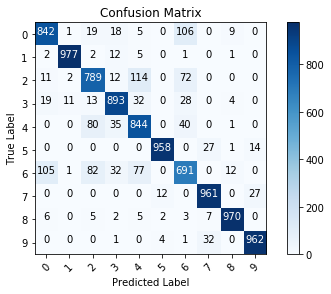

In [44]:
# Confusion Matrix Plot

y_pred = model.predict(X_test_reshaped).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot via Defined Confusion Matrix

plot_confusion_matrix(cm, list(range(10)))


In [0]:
# Show Misclassified Example

misclass = np.where(y_pred != y_test)


In [0]:
misclass

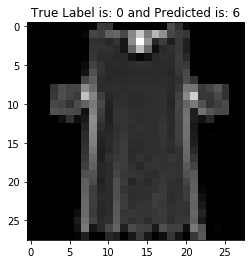

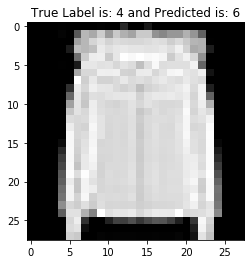

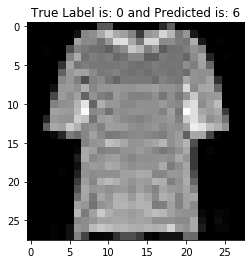

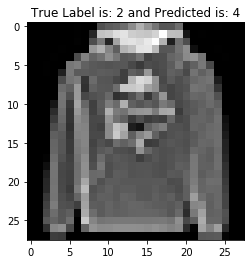

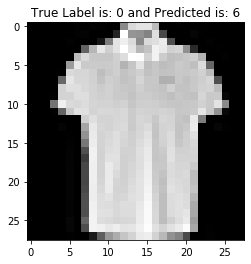

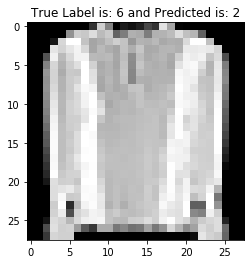

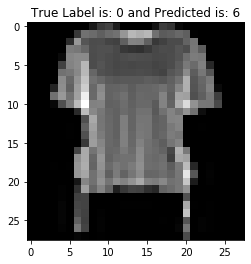

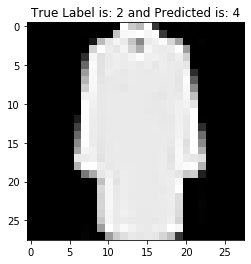

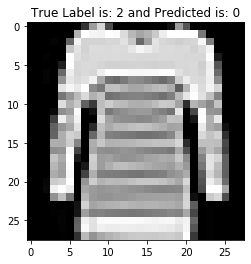

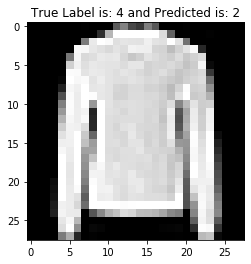

In [47]:
# While Loop to Plot all Misclassified Points
wh = 10
while wh != 0:
  i = np.random.choice(misclass[0])
  plt.imshow(X_test[i], cmap='gray')
  plt.title("True Label is: %s and Predicted is: %s" % (y_test[i], y_pred[i]))
  plt.show()
  wh -= 1
  print('\n')